# Python ABC

1. Virtual enviroment
2. PEP 8
3. Jupyter
4. Exception
5. Loop ... else
6. Generators
7. Function wrappers and traps
8. Formatted strings
9. Dictionaries
10. Logging
11. Command line arguments
12. Problem solving with Python
13. Extra info
14. BONUS: Operator overloading

## 1. Virtual enviroment

### 1.1 The old way
##### How?
`python3 -m venv <name>` or `python -m venv <name>` (if py3 is your main interpreter)

activate it via `source .../<name>/bin/activate`
deactivate via `deactivate`

##### Where?
somewhere in your home directory or project directory

* `alias <whatever>='source .../<name>/bin/activate'`(good)
* use a wrapper bash function (better)

##### Why?
* cleaner than putting everything in the system
* `pip freeze > packages` and then `pip install -r packages`

### 1.2 The right... aehh the new way
##### How?
`pip3 install pipenv` or `pip install pipenv` (if py3 is your main interpreter)

* spawn new enviroment: `pipenv --three`
* go inside: `pipenv shell`
* install packages (lazy way): `pipenv install —skip-lock <name>`

##### Where?
see avobe.

##### Why?
* even cleaner!
* `pipenv install` in a dir w a Pipfile
* much more portable


In [1]:
import sys

print(sys.version)

3.7.3 (default, Aug 20 2019, 17:04:43) 
[GCC 8.3.0]


### 2. PEP 8

[PEP 8](https://www.python.org/dev/peps/pep-0008) is a style guide you should follow (as close as possible) when coding python. Some general notes about it:

* multiples of four spaces instead of tabs
* maximum line size 79 characters
* regular variable/function names lower case with underscores (but class names CapConvention)

In [2]:
import numpy as np

# constants uppercase
I_AM_A_CONSTANT = 3.1415


class Polynom:
    """Class description."""
    
    # somehow static variable
    _polynoms = []

    # function decorator
    @property
    def polynoms(self):
        return type(self)._polynoms
    
    def __init__(self, coefficients):
        """Method description."""
        self.degree = len(coefficients) - 1
        self.coefficients = coefficients
        
        Polynom._polynoms.append([self.degree, self.coefficients])
    
    # ``private'' function
    def _compute(self, x, iteration):
        if 1 == iteration:
            return self.coefficients[0] * x + self.coefficients[1]
        return (x * self.__compute(x, iteration - 1)
                + self.coefficients[iteration])
    
    def __call__(self, x):
        """Overload of () so that we can `call' the class."""    
        return self.__compute(x, iteration=self.degree)  


def quadratic_function(x, a, b=0, c=0):
    """Compute y = a*x**2 + b*x + c."""
    return a*x**2 + b*x + c


x = np.linspace(0, 1, num=120)

# regular use
poly = Polynom([1, -2, 3])
y_1 = poly(x)

print(poly.polynoms)

# using unpacking of a tuple
y_2 = quadratic_function(x, *(I_AM_A_CONSTANT, -2,
                              poly.coefficients[-1]))

# using keyword arguments
kwargs = {'a': .5, 'c': 5}
y_3 = quadratic_function(x, **kwargs)

# save some dummy output for later
np.savetxt('./data/EPOS_LHC_proton_18.5_19', np.array([x, y_1]).T)
np.savetxt('./data/EPOS_LHC_helium_19_19.5', np.array([x, y_2]).T)
np.savetxt('./data/EPOS_LHC_oxygen_19.5_20', np.array([x, y_3]).T)

[[2, [1, -2, 3]]]


## 3. Jupyter

* `pip install jupyter` or `pipenv install --skip-lock jupyter`
* `jupyter notebook`

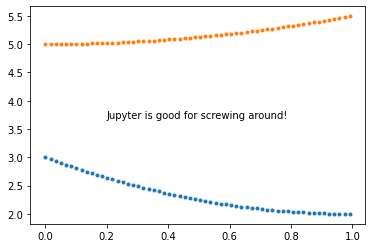

In [3]:
%matplotlib inline
import numpy as np  # unnecessary
import matplotlib.pyplot as plt

data = np.loadtxt('./data/EPOS_LHC_proton_18.5_19')
x, y = np.loadtxt('./data/EPOS_LHC_oxygen_19.5_20').T

plt.figure(0)
plt.plot(data[::2, 0], data[::2, 1], '.')

mask = [True, False] * 60
plt.plot(x[mask], y[mask], '.')

ax = plt.gca()
_ = ax.text(0.5, 0.5, "Jupyter is good for screwing around!",
            ha='center', va='center', transform=ax.transAxes)


## 4. Exceptions

1. ask for forgivness not permission
2. use them!

In [4]:
from itertools import product
from os import listdir
from os.path import join


# two spaces before/after functions
def count_number_of_lines(filename):
    """Count number of lines by iterating over file."""
    with open(filename) as f:
        for i, l in enumerate(f):
            pass
    
    return i + 1


had_model = 'EPOS'

name_components = [['EPOS_LHC' if 'EPOS' == had_model else 'QGSJET-II.04'],
                   ['proton', 'helium', 'oxygen', 'iron'],
                   ['18.5_19', '19_19.5', '19.5_20']]  # two spaces for inline c.

print(listdir('./data'))

line_count = {}
for name_component in product(*name_components):
    try:
        filename = '_'.join(name_component)
        line_count[filename] = count_number_of_lines(join('./data', filename))

        # for testing purposes
        print(join('./base_dir', *name_component))
    except FileNotFoundError as e:
        print(e)
        continue
    finally:
        print('This is run in each case!')

    print('This is only run if there is no exception!')
    
print(line_count)

['EPOS_LHC_helium_19_19.5', 'config', 'EPOS_LHC_proton_18.5_19', 'refresh_button.png', 'EPOS_LHC_oxygen_19.5_20']
./base_dir/EPOS_LHC/proton/18.5_19
This is run in each case!
This is only run if there is no exception!
[Errno 2] No such file or directory: './data/EPOS_LHC_proton_19_19.5'
This is run in each case!
[Errno 2] No such file or directory: './data/EPOS_LHC_proton_19.5_20'
This is run in each case!
[Errno 2] No such file or directory: './data/EPOS_LHC_helium_18.5_19'
This is run in each case!
./base_dir/EPOS_LHC/helium/19_19.5
This is run in each case!
This is only run if there is no exception!
[Errno 2] No such file or directory: './data/EPOS_LHC_helium_19.5_20'
This is run in each case!
[Errno 2] No such file or directory: './data/EPOS_LHC_oxygen_18.5_19'
This is run in each case!
[Errno 2] No such file or directory: './data/EPOS_LHC_oxygen_19_19.5'
This is run in each case!
./base_dir/EPOS_LHC/oxygen/19.5_20
This is run in each case!
This is only run if there is no exception

## 5. Loop ... else

Python as a neat feature in form of loop ... else construct.

In [6]:
import json
from os.path import join


def test_function(a, b, c, none_test=None):
    """."""
    print(a)
    print(b)
    
    if none_test is None:
        print(c)

    
cfg_dirs = ['/dir_a', '/dir_b', '/dir_c']
cfg_dirs += ['./data']

cfg_content = None

for cfg_dir in cfg_dirs:
    try:
        with open(join(cfg_dir, 'config')) as f:
            cfg_content = json.load(f)
            break
    except FileNotFoundError:
        pass
else:
    raise FileNotFoundError('No config file found.')

print(cfg_content)


test_function(**cfg_content)

{'a': 1, 'b': [0, 1, 2], 'c': 5}
1
[0, 1, 2]
5


## 6. Generators

In [45]:
def permutations(perm):
    """."""
    if [] == perm:
        yield []

    for i, p in enumerate(perm):
        perm_tmp = perm[:i] + perm[i + 1:]

        for p_n in permutations(perm_tmp):
            yield ([p] + p_n)


def test_function(test_argument=False):
    """How to use boolean values."""
    if test_argument:
        return 1
    else:
        return 0


for perm in permutations([test_function, 2, 'a']):
    print(perm)

print(permutations(5))
print(list(range(5)))


[<function test_function at 0x7f4b1c22ee18>, 2, 'a']
[<function test_function at 0x7f4b1c22ee18>, 'a', 2]
[2, <function test_function at 0x7f4b1c22ee18>, 'a']
[2, 'a', <function test_function at 0x7f4b1c22ee18>]
['a', <function test_function at 0x7f4b1c22ee18>, 2]
['a', 2, <function test_function at 0x7f4b1c22ee18>]
range(0, 5)
<generator object permutations at 0x7f4b1c1ed048>


## 7. Function decorators

In [28]:
def print_output(func):
    """Print function output."""
    
    def print_output_wrapper(*args, **kwargs):
        for _ in range(2):
            print()
        
        output = func(*args, **kwargs)
        print(output)
        
        return output
    return print_output_wrapper


@print_output
def trap(test=[]):
    test.append(1)
    return test


# be aware of references!
trap()
trap()
print(trap(), trap([2, 1]), trap())

# to give a decorater extra arguments we need a class-based
# approach (overload __call__ ...)!



[1]


[1, 1]


[1, 1, 1]


[2, 1, 1]


[1, 1, 1, 1]
[1, 1, 1, 1] [2, 1, 1] [1, 1, 1, 1]


## 8. Formatted strings

In [61]:
a = 5.5

# method 1 (no no)
print('%f, %.02f, %e' % (a, a, a))

# method 2 (ok)
# can be used iteratively!
print('{0:f}, {0:.02f}, {0:e}'.format(a))

# method 3 (good if applyable!)
print(f'{a:f}, {a:0.02f}, {a:e}')


5.500000, 5.50, 5.500000e+00
5.500000, 5.50, 5.500000e+00
5.500000, 5.50, 5.500000e+00


## 9. Dictionaries

In [72]:
# how to access, initialize, and iterate over dicts
tmp = dict(a=2, c='8', e=7)

tmp.setdefault('a', 3)
tmp.setdefault('d', 3)

print(tmp.get('a', 3))
print(tmp.get('b', 'works'))
print(tmp.get('c', 3))
print(tmp.get('d', 'works'))

for k, item in tmp.items():
    print(k, item)

# special dict
tmp = {(0, 1): 1.1, (1, 1): 0.1}

print(tmp)
print(tmp[(0, 1)])


2
works
8
3
a 2
c 8
e 7
d 3
{(0, 1): 1.1, (1, 1): 0.1}
1.1


## 10. Logging

see script example: logger_test.py

in jupyter this is problematic, as you see here:

In [19]:
import logging

# taken from Logging HOWTO
# create logger
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

logger.debug('test')
logger.debug('test')


2020-04-28 10:14:23,030 - simple_example - DEBUG - test
2020-04-28 10:14:23,030 - simple_example - DEBUG - test
2020-04-28 10:14:23,030 - simple_example - DEBUG - test
DEBUG:test
2020-04-28 10:14:23,033 - simple_example - DEBUG - test
2020-04-28 10:14:23,033 - simple_example - DEBUG - test
2020-04-28 10:14:23,033 - simple_example - DEBUG - test
DEBUG:test


## 11. Command line arguments

see script example: argparse_test.py

again, in jupyter this is problematic. ;)

In [ ]:
# ...

## 12. Problem solving with Python

* in general: python's philosophy is throwing computers at your problem
* not useful if low, machine-near, efficient code is required
* good enough for every other case

see problem.py.

In [29]:
# ...

## 13. Extra info

A good start of getting used to Python is to look at its antipatterns: unpythonic code snippets.

[The Little Book of Python Anti-Patterns](https://docs.quantifiedcode.com/python-anti-patterns/)

In [ ]:
## 14. BONUS: Operator overloading

In [4]:
class SemiPype:  # name stolen from another project (:
    """."""
    
    def __init__(self, func, pass_as_kwargs=False, **kwargs):
        """."""
        self.func = func
        self.kwargs = kwargs
        
        self.pass_as_kwargs = pass_as_kwargs
        
        self.first_call = True
    
    def __or__(self, func):
        """."""
        if self.first_call or self.pass_as_kwargs:
            self.kwargs = self.func(**self.kwargs)
            self.first_call = False
        else:
            self.kwargs = self.func(self.kwargs)
        
        self.func = func
        
        return self
    
    def __ror__(self, func):
        """Do sth. crazy!"""
        print('aaaaaaaa')
        return self


def test_func_0(a, b):
    print(a, b)
    return dict(a=a, b=b+a)


pype = SemiPype(test_func_0, pass_as_kwargs=True, a=1, b=0)

pype | test_func_0 | test_func_0  # 1 0; 1 1
test_func_0 | pype | test_func_0  # aaaaaaa; 1 2


1 0
1 1
aaaaaaaa
1 2
